In [1]:
"""
make energy deposit plot in TOF
@aurthor Jiancheng Zeng
@Nov 20 2021
"""

'\nmake energy deposit plot in TOF\n@aurthor Jiancheng Zeng\n@Nov 20 2021\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import time
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import random
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [3]:
"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type
"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_5e7_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_deuteron_5e7_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_5e7_Ene_0_1500_vector.txt", delimiter = ' '))

print("finish reading data!")

finish reading data!


In [4]:
sigma = 0.16    #energy resolution percentage
deltaT = 0.5    #timing resolution/ns
time_pbar_err = []
dEOut_pbar_err = []
dEIn_pbar_err = []

time_He3bar_err = []
dEOut_He3bar_err = []
dEIn_He3bar_err = []

for i in range(len(anti_proton_Old[:, 3])):
    dEOut_pbar_err.append(random.gauss(anti_proton_Old[i, 1], sigma * anti_proton_Old[i, 1]))
    dEIn_pbar_err.append(random.gauss(anti_proton_Old[i, 2], sigma * anti_proton_Old[i, 2]))
    time_pbar_err.append(anti_proton_Old[i, 3] + deltaT * 2 * (random.random() - 0.5))
    if(i<len(anti_He3_Old[:, 3])):
        dEOut_He3bar_err.append(random.gauss(anti_He3_Old[i, 1], sigma * anti_He3_Old[i, 1]))
        dEIn_He3bar_err.append(random.gauss(anti_He3_Old[i, 2], sigma * anti_He3_Old[i, 2]))
        time_He3bar_err.append(anti_He3_Old[i, 3] + deltaT * 2 * (random.random() - 0.5))
    print("applying error:"+str(int(100*i/len(anti_proton_Old[:, 3])))+"%", end='\r')
    
time_pbar_err = np.array(time_pbar_err)
dEOut_pbar_err = np.array(dEOut_pbar_err)
dEIn_pbar_err = np.array(dEIn_pbar_err)

time_He3bar_err = np.array(time_He3bar_err)
dEOut_He3bar_err = np.array(dEOut_He3bar_err)
dEIn_He3bar_err = np.array(dEIn_He3bar_err)
print("Finished processing!")

Finished processing!


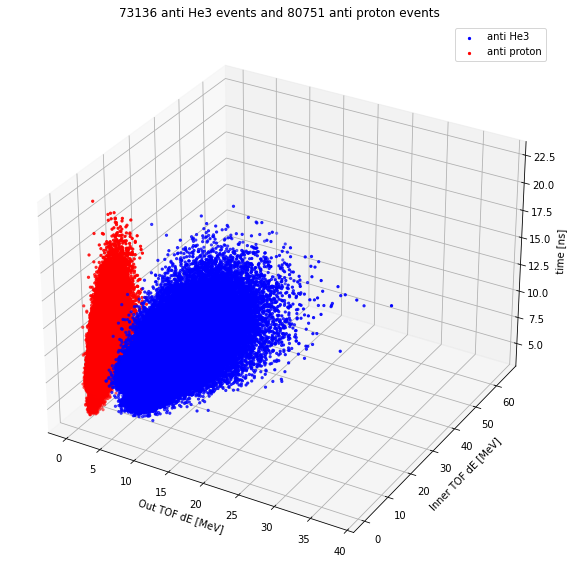

In [5]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err, dEIn_He3bar_err, time_He3bar_err, marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err, dEIn_pbar_err, time_pbar_err, marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
plt.legend()
plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3_Old[:, 2]), len(anti_proton_Old[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


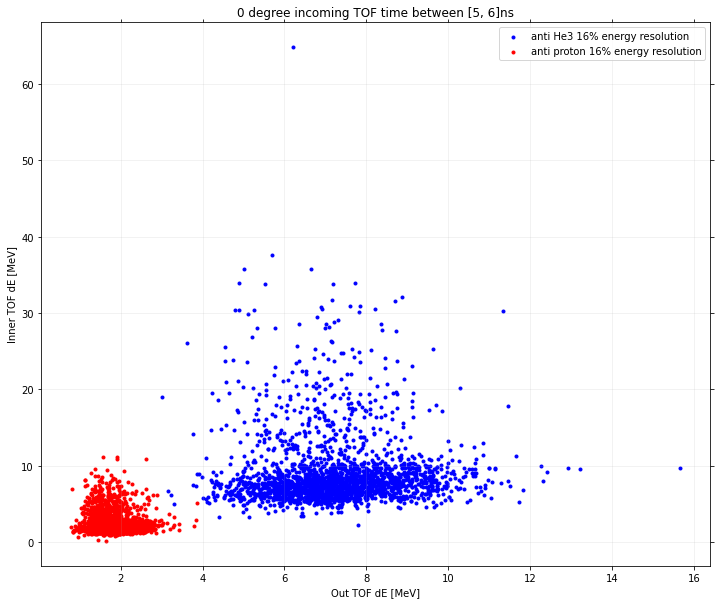

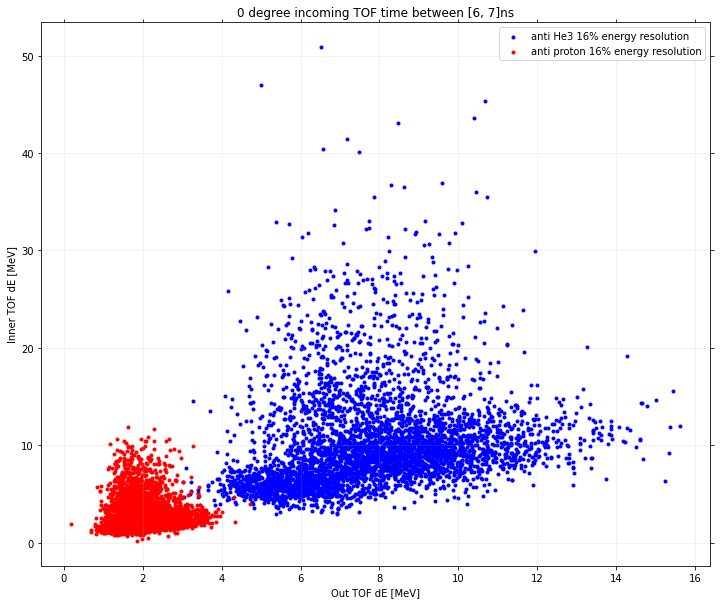

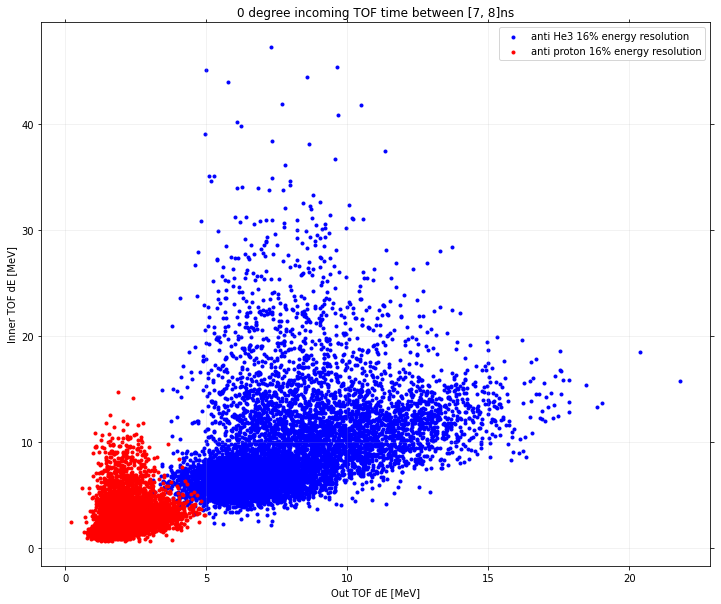

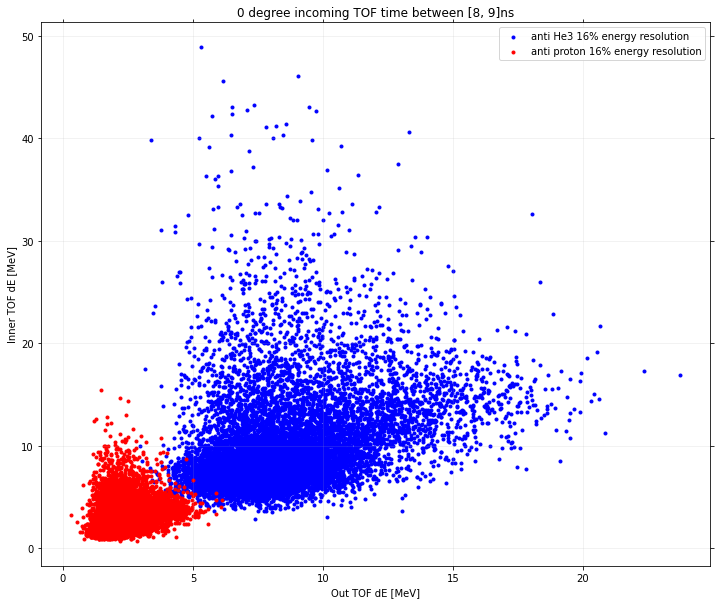

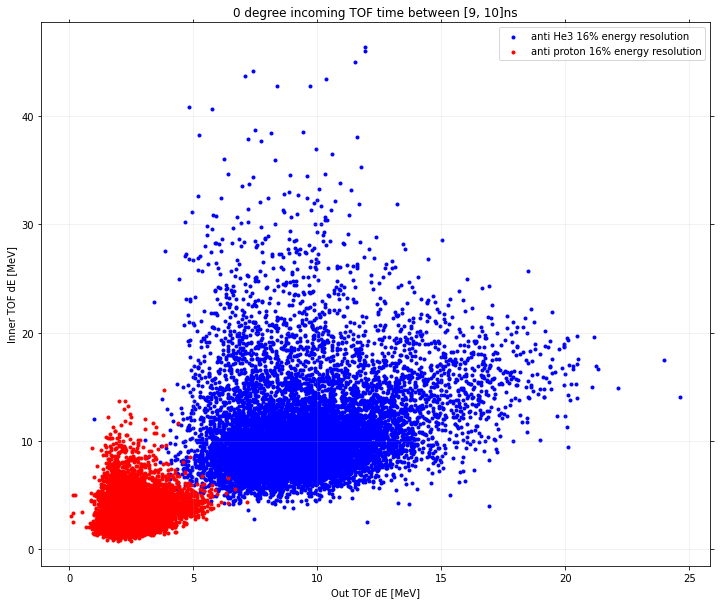

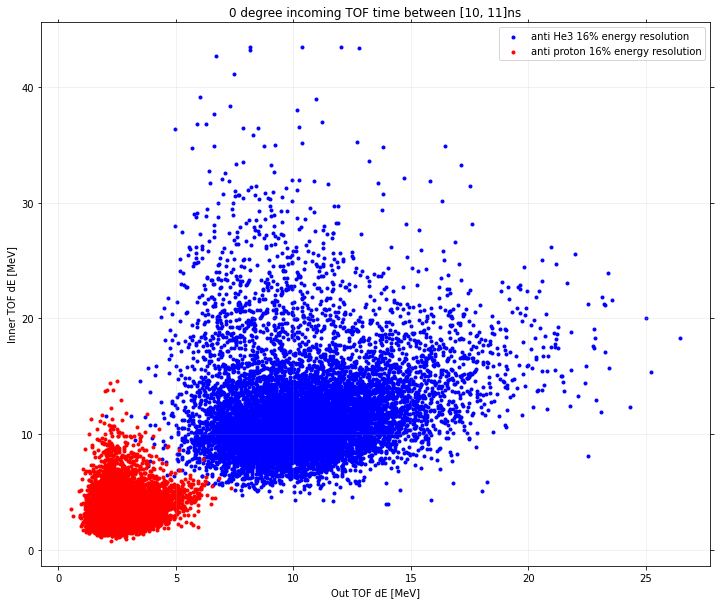

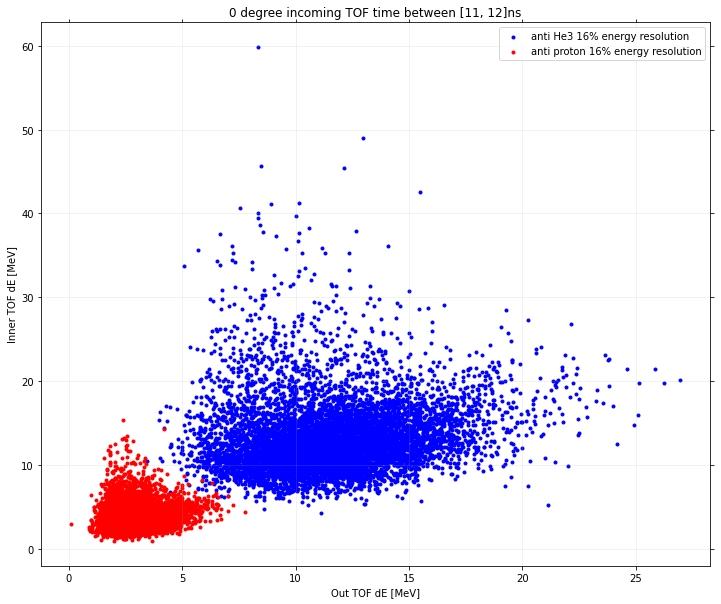

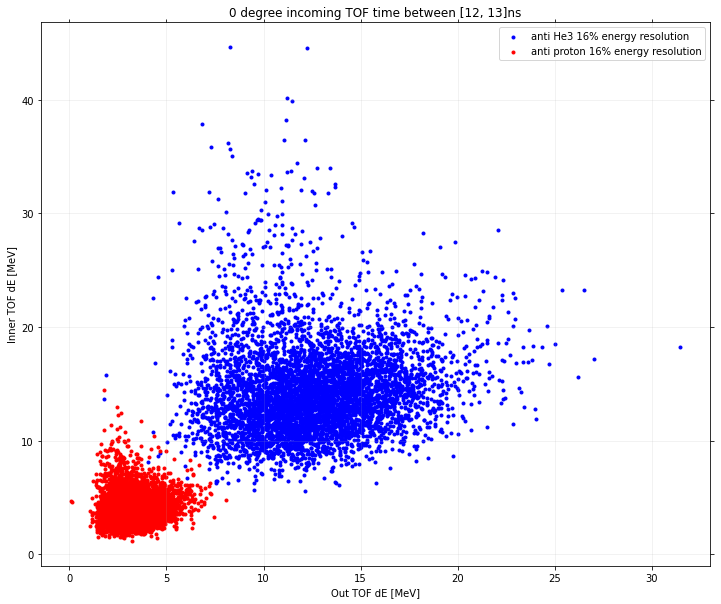

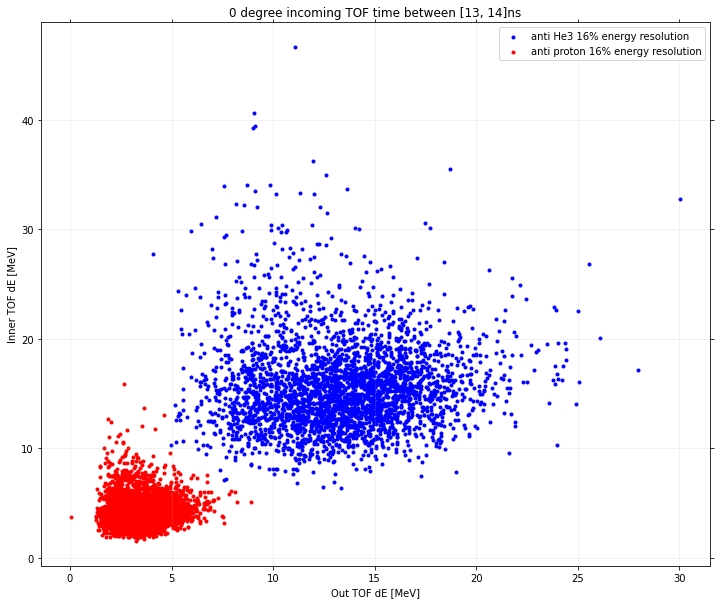

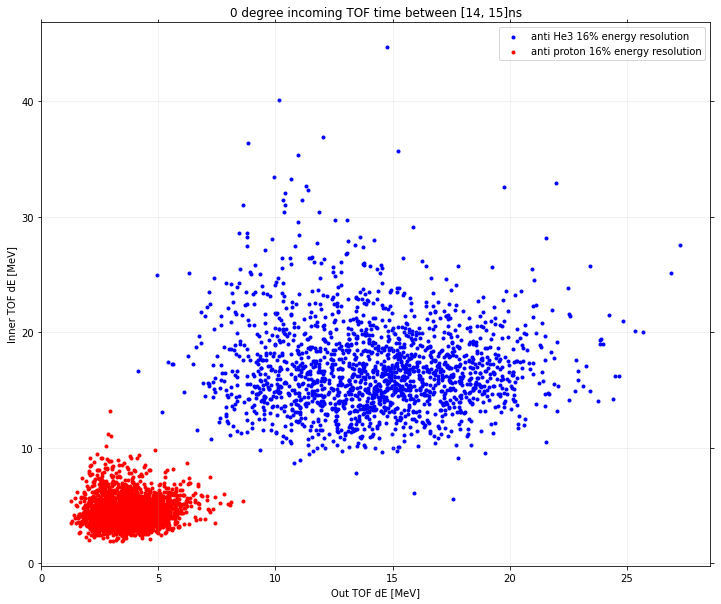

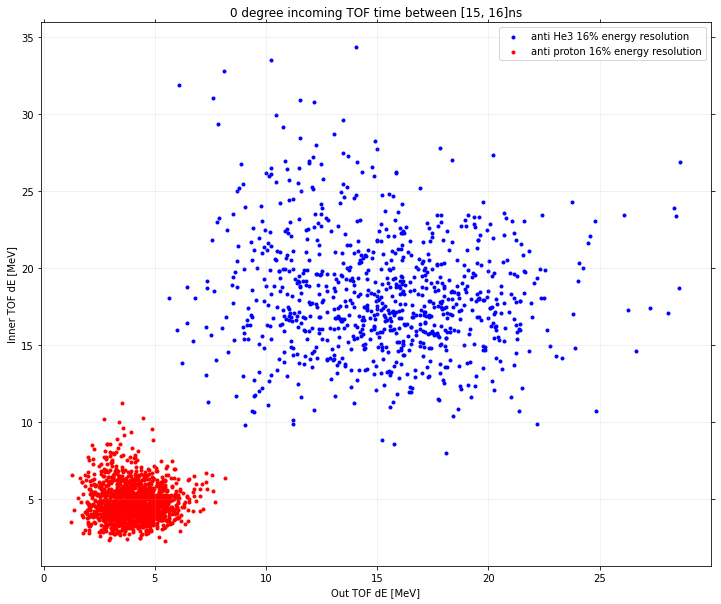

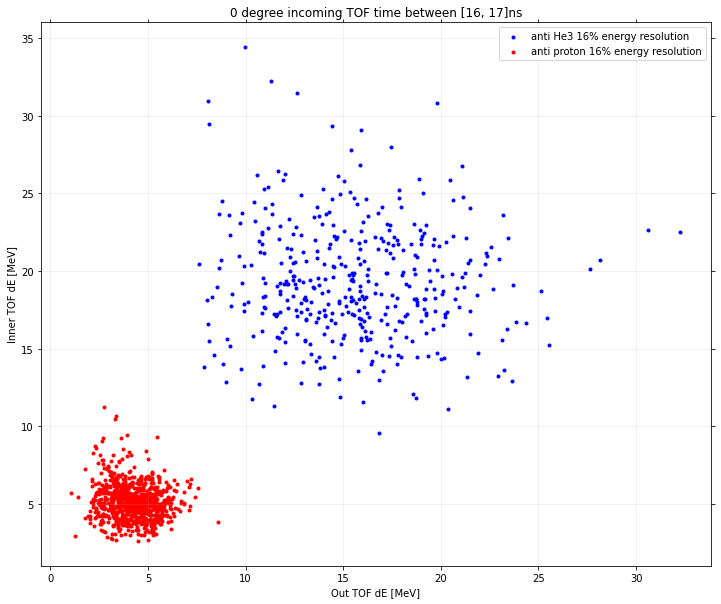

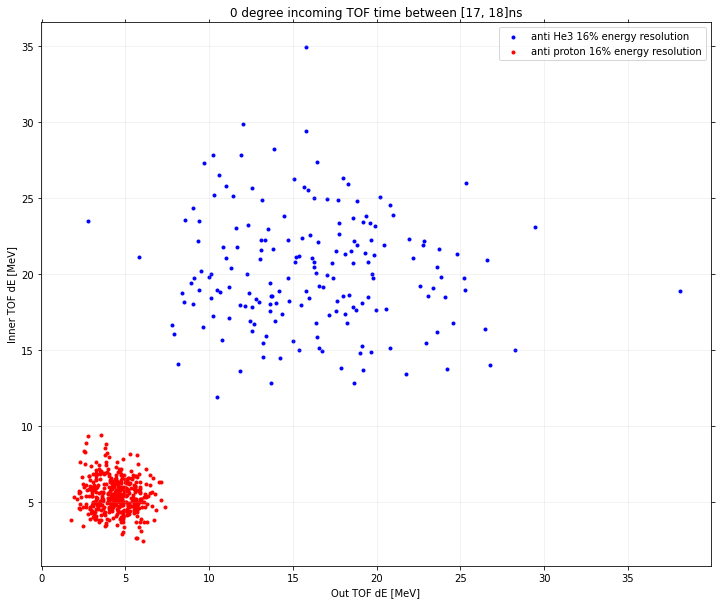

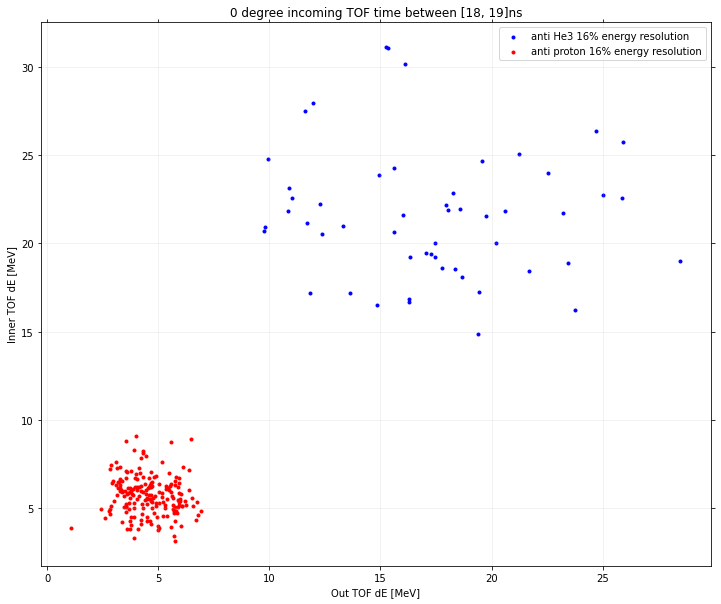

In [19]:
start_time = 5
for n in range(14):
    fig = plt.figure(figsize=(12,10))
    plt.cla()
    plt.scatter(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], dEIn_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], label = "anti He3 %d%% energy resolution"%(100*sigma), marker = '.', color = 'b')
    plt.scatter(dEOut_pbar_err[np.logical_and(time_pbar_err > start_time+n, time_pbar_err < start_time + 1 +n)] , dEIn_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)], label = "anti proton %d%% energy resolution"%(100*sigma), marker = '.', color = 'r')
    #plt.scatter(dEOut_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], dEIn_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], label = "anti deuteron 45 degree", marker = '.', color = 'lightcoral')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.title("0 degree incoming TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.show()
    time.sleep(1)

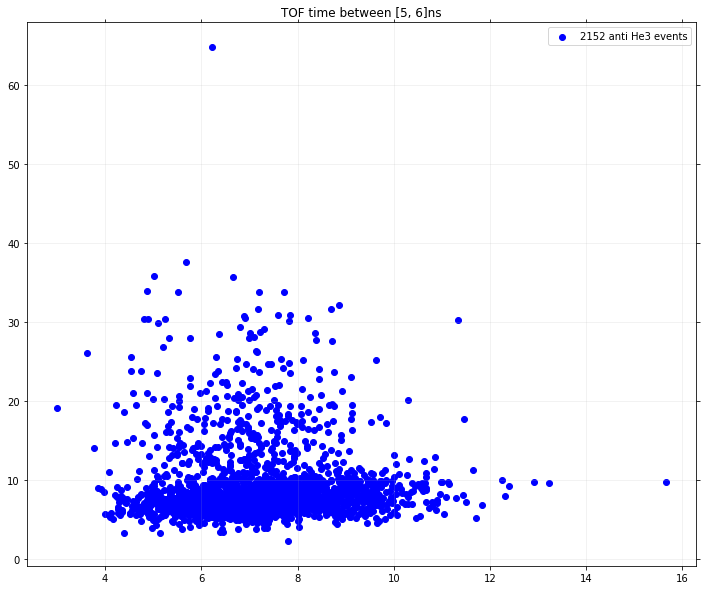

Outer TOF cut:3.8563009830257378
Inner TOF cut:11.175465978339517
cut efficiency:0.9972196478220574


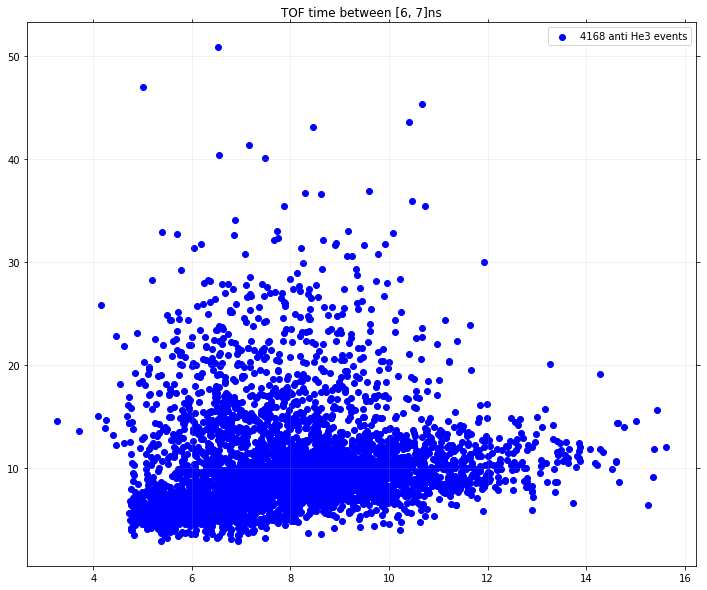

Outer TOF cut:4.728459961465111
Inner TOF cut:11.881348259769162
cut efficiency:0.964145269488781


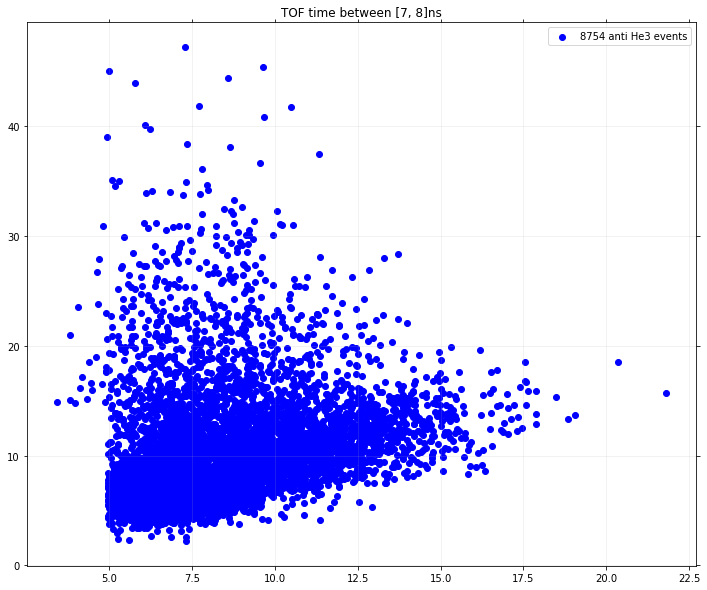

Outer TOF cut:4.953771767772171
Inner TOF cut:14.747816589330842
cut efficiency:0.9469926438771095


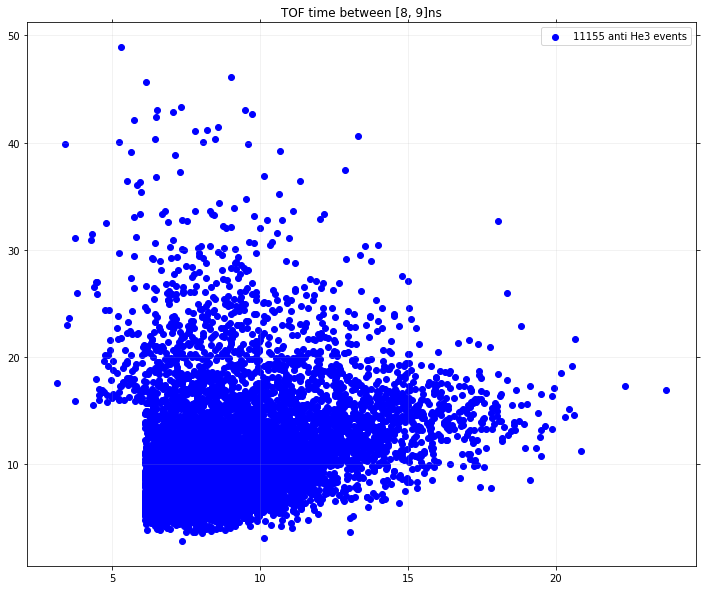

Outer TOF cut:6.0991456905383465
Inner TOF cut:15.415865995620871
cut efficiency:0.8956242472902449


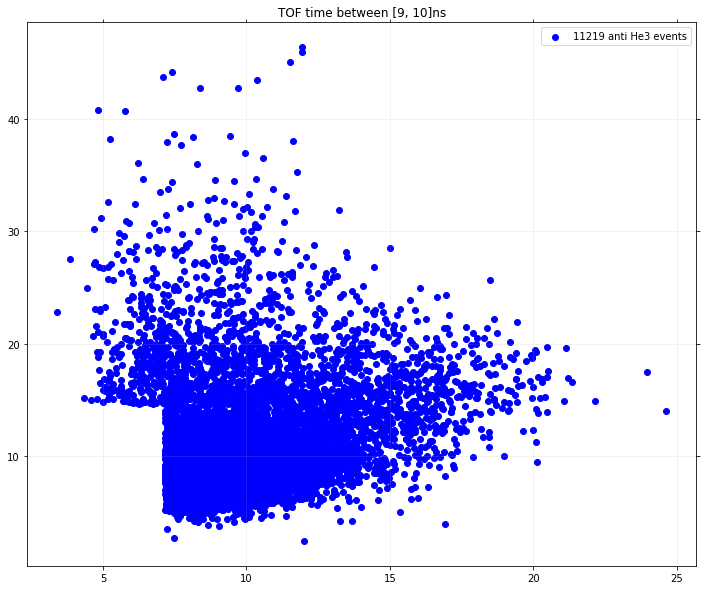

Outer TOF cut:7.156314039656504
Inner TOF cut:14.666857119520738
cut efficiency:0.8717171717171717


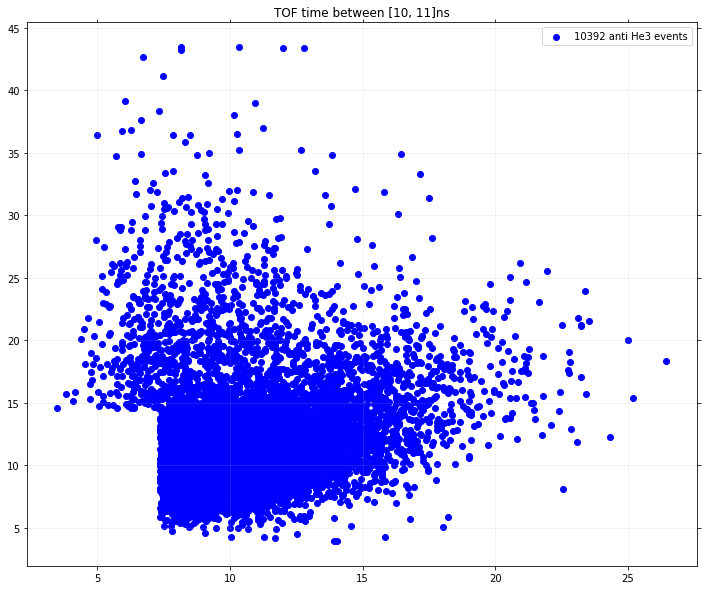

Outer TOF cut:7.3455197083334784
Inner TOF cut:14.544750443644984
cut efficiency:0.9281057426096275


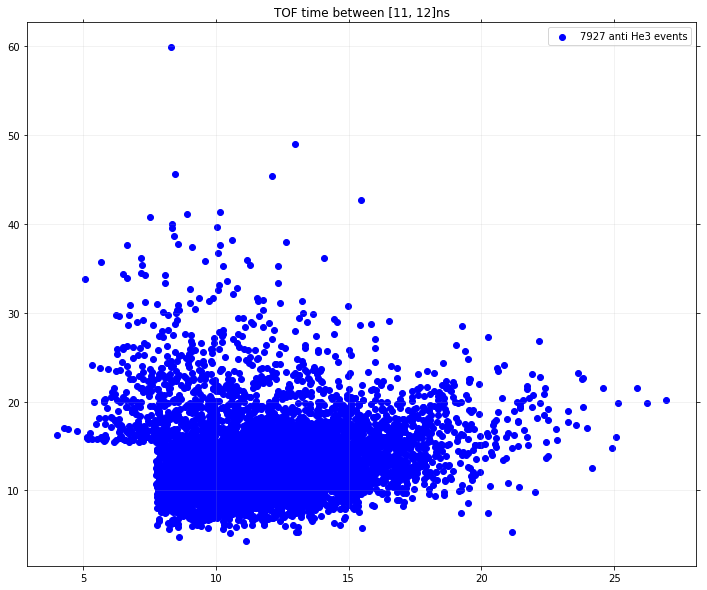

Outer TOF cut:7.758529548078974
Inner TOF cut:15.42662049285892
cut efficiency:0.9325882352941176


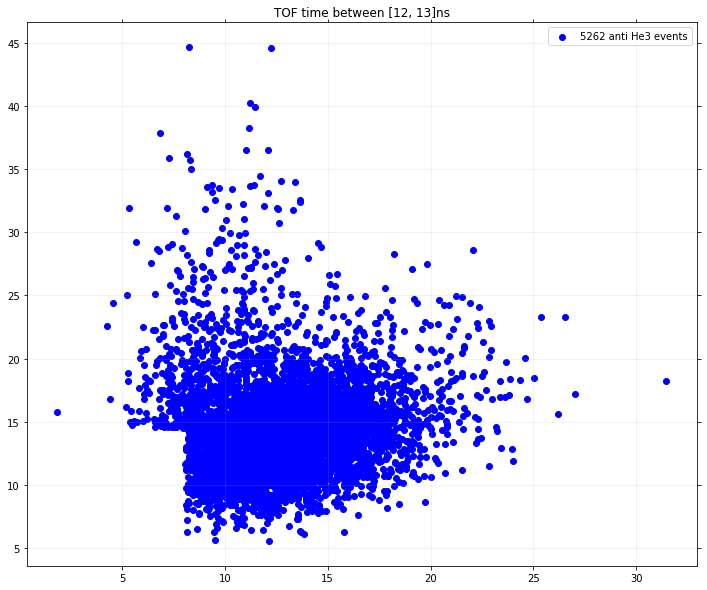

Outer TOF cut:8.070847709383187
Inner TOF cut:14.469311482326034
cut efficiency:0.9570753001091306


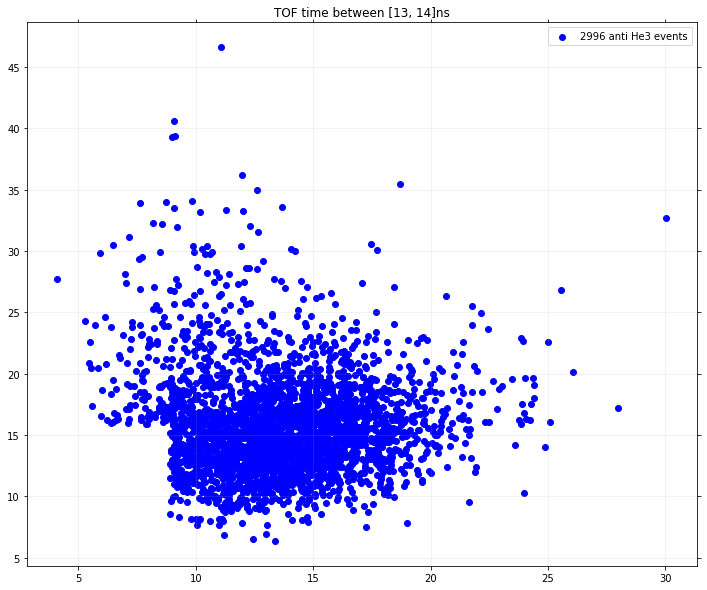

Outer TOF cut:8.901973820860423
Inner TOF cut:15.878718911757606
cut efficiency:0.9415461973601509


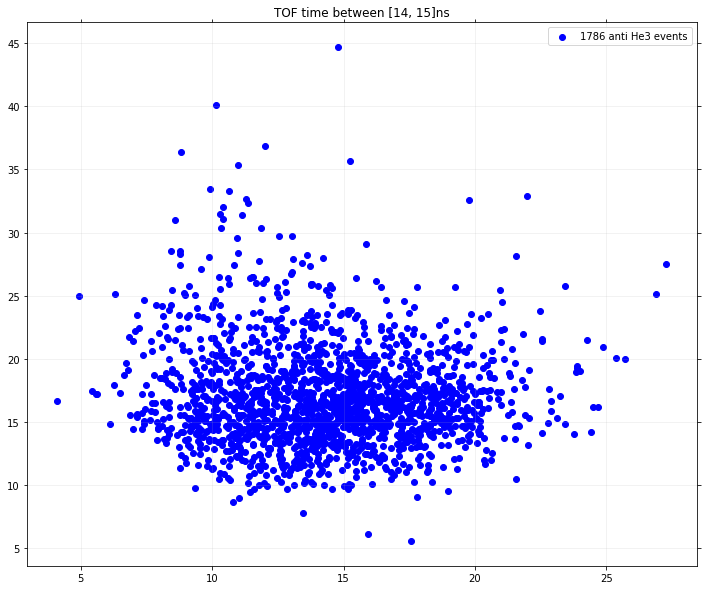

Outer TOF cut:8.630880186349255
Inner TOF cut:13.217213122553899
cut efficiency:0.9922222222222222


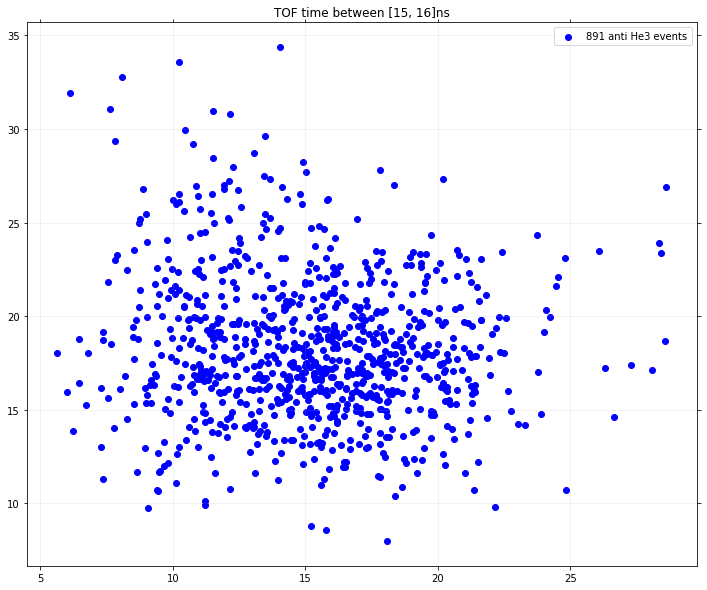

Outer TOF cut:8.14062689138463
Inner TOF cut:11.258680699961635
cut efficiency:0.9988789237668162


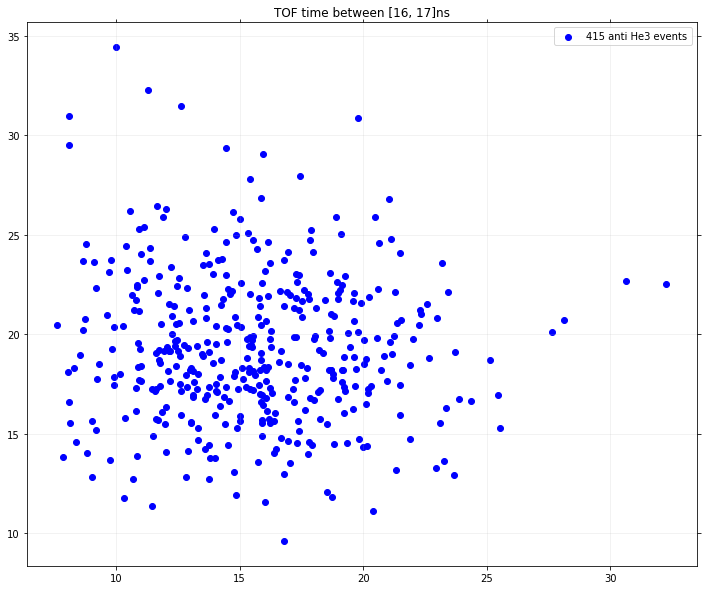

Outer TOF cut:8.584645689019423
Inner TOF cut:11.26384534339996
cut efficiency:0.9975961538461539


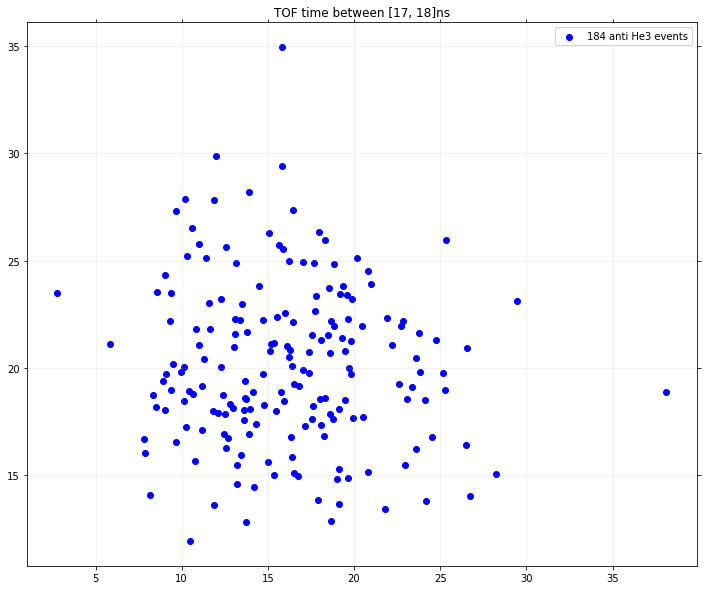

Outer TOF cut:7.364696420652364
Inner TOF cut:9.368173927611616
cut efficiency:0.9945945945945946


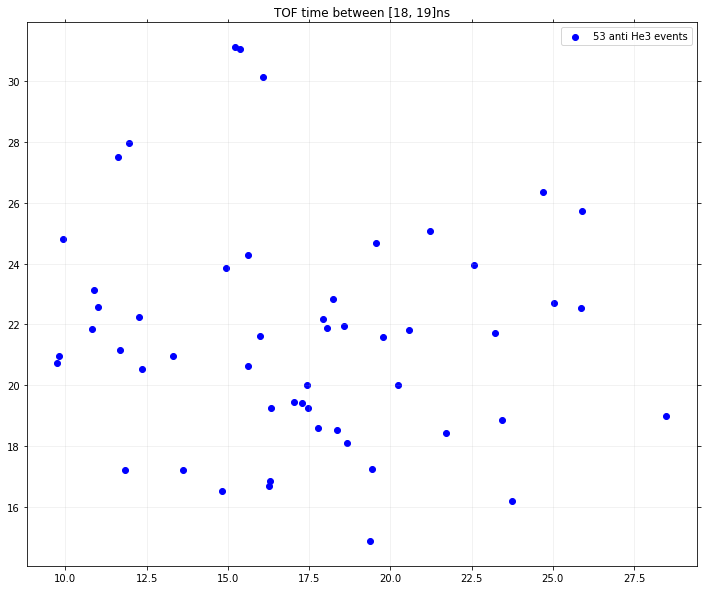

Outer TOF cut:6.9047846365147585
Inner TOF cut:9.058747869254786
cut efficiency:0.9814814814814815
Finished!
 67354 anti He3 events been kept
Average cut efficiency = 92%


In [25]:
start_time = 5
low_limit = 10
high_limit = 11
events_kept = 0
for n in range(14):
    fig = plt.figure(figsize=(12,10))
    N_x = []
    N_y = []
    He3bar_cut_x = []
    He3bar_cut_y = []
    plt.cla()
    cut_min_x = np.max(dEOut_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)]) 
    cut_min_y = np.max(dEIn_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)])
    He3bar_cut_x = dEOut_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    He3bar_cut_y = dEIn_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    N_x = He3bar_cut_x[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    N_y = He3bar_cut_y[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    plt.scatter(N_x, N_y, color = 'b', label = '%d anti He3 events'%len(N_y))
    plt.grid(alpha = 0.2)
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.legend()
    plt.show()
    events_kept = events_kept + len(N_y)
    print("Outer TOF cut:"+str(cut_min_x))
    print("Inner TOF cut:"+str(cut_min_y))
    print("cut efficiency:"+str(len(N_x)/(len(He3bar_cut_x)+1)))
    
print("Finished!\n %d anti He3 events been kept"%events_kept)
print("Average cut efficiency = %d%%"%(100*events_kept/len(anti_He3_Old[:, 2])))

In [22]:
print(67354/73136)

0.9209418070444104
